In [1]:
"""
Using the prophet library to perform a simple forecast for COVID-19 cases in Ghana based on existing data
"""

'\nUsing the prophet library to perform a simple forecast for COVID-19 cases in Ghana based on existing data\n'

In [2]:
#importing libraries
import pandas as pd
from fbprophet import Prophet

In [3]:
# reading data
df = pd.read_csv("data.csv")

In [4]:
df.head()

,ds,y
0,2020-03-11,0
1,2020-03-12,2
2,2020-03-13,2
3,2020-03-14,2
4,2020-02-15,6


In [5]:
# fitting the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
# making future forecasts
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
399,2021-04-14
400,2021-04-15
401,2021-04-16
402,2021-04-17
403,2021-04-18


In [7]:
future.head()

,ds
0,2020-02-15
1,2020-03-11
2,2020-03-12
3,2020-03-13
4,2020-03-14


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [10]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
399,2021-04-14,6178.805557,6032.557432,6324.646021,6177.797422,6179.756715,-0.624318,-0.624318,-0.624318,-0.624318,-0.624318,-0.624318,0.0,0.0,0.0,6178.181239
400,2021-04-15,6194.454417,6052.136814,6345.770483,6193.442047,6195.407840,3.561599,3.561599,3.561599,3.561599,3.561599,3.561599,0.0,0.0,0.0,6198.016016
401,2021-04-16,6210.103276,6058.722870,6341.695855,6209.084459,6211.059497,-10.252336,-10.252336,-10.252336,-10.252336,-10.252336,-10.252336,0.0,0.0,0.0,6199.850941
402,2021-04-17,6225.752136,6159.984878,6458.012588,6224.731186,6226.710185,78.241392,78.241392,78.241392,78.241392,78.241392,78.241392,0.0,0.0,0.0,6303.993528
403,2021-04-18,6241.400996,6060.490066,6343.504347,6240.378223,6242.360938,-32.368155,-32.368155,-32.368155,-32.368155,-32.368155,-32.368155,0.0,0.0,0.0,6209.032841


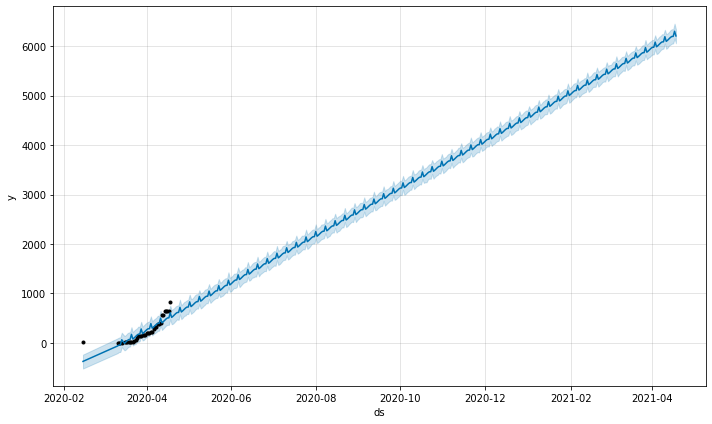

In [11]:
fig1 = model.plot(forecast)

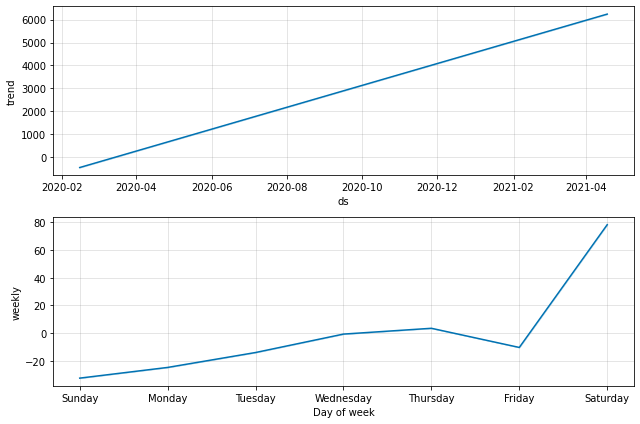

In [12]:
fig2 = model.plot_components(forecast)

In [13]:
to_csv = forecast[['ds','yhat']]

In [14]:
to_csv.head()

,ds,yhat
0,2020-02-15,-377.850379
1,2020-03-11,-65.627707
2,2020-03-12,-45.798255
3,2020-03-13,-43.968654
4,2020-03-14,60.168609


In [15]:
to_csv.to_csv('forecast.csv', sep=',')